# 包含3个文件
ratings.csv：包含用户对电影的评分信息，每行代表一个用户对一个电影的评分。文件中包含以下字段：
userId: 用户ID
movieId: 电影ID
rating: 用户对电影的评分，范围为0.5到5，以0.5为步长
timestamp: 用户评分的时间戳，表示从1970年1月1日以来的秒数

movies.csv：包含电影信息，每行代表一个电影。文件中包含以下字段：
movieId: 电影ID
title: 电影标题，包括电影名称和年份
genres: 电影类型，以竖线分隔
tags.csv：包含用户给电影打的标签信息，每行代表一个用户对一个电影打的一个标签。文件中包含以下字段：
userId: 用户ID
movieId: 电影ID
tag: 用户打的标签
timestamp: 标签打的时间戳

In [29]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
# 读取一个示例
import pandas as pd
sep = '::'
rating = pd.read_csv('ratings.dat', header=None, sep=sep)  # 1 122 5 838985046
movies = pd.read_csv('movies.dat', header=None, sep=sep)
tags = pd.read_csv('tags.dat', header=None, sep=sep)
# 设置标签
rating.columns = ['userId', 'movieId', 'rating', 'timestamp']
movies.columns = ['movieId', 'title', 'genres']
tags.columns = ['userId', 'movieId', 'tag', 'timestamp']

print(rating[:2])
print(movies[:2])
print(tags[:2])

   userId  movieId  rating  timestamp
0       1      122     5.0  838985046
1       1      185     5.0  838983525
   movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
1        2    Jumanji (1995)                   Adventure|Children|Fantasy
   userId  movieId         tag   timestamp
0      15     4973  excellent!  1215184630
1      20     1747    politics  1188263867


# 3 数据分析要求
## 3.1 数据摘要
      标称属性，给出每个可能取值的频数
      数值属性，给出5数概括及缺失值的个数

## 3.2 数据可视化
      使用直方图、盒图等检查数据分布及离群点

In [30]:
# 标称有 userId, movieId, title, genres, tag
from collections import Counter
import itertools
userIds = rating['userId']
user_dict = Counter(userIds)
print(user_dict.most_common()[:10]) # 打印出前10个出现最多的 userId 和 频率
movieIds = rating['movieId']
movie_dict = Counter(movieIds)
print(movie_dict.most_common()[:10])  # 出现频率最高的 movieId
title = movies['title']
title_dict = Counter(title)
print(title_dict.most_common()[:10]) # 出现频率前10 的movie title
genres = itertools.chain(*[genres.split('|') for genres in movies['genres']]) # 对类型进行分割
genres_dict = Counter(genres)
print(genres_dict.most_common()[:10])  # 电影体裁频率前十
tag = tags['tag']
tag_dict = Counter(tag)
print(tag_dict.most_common()[:10])  # 最多的标签

[(59269, 7359), (67385, 7047), (14463, 5169), (68259, 4483), (27468, 4449), (3817, 4165), (19635, 4165), (63134, 3755), (58357, 3697), (27584, 3479)]
[(296, 34864), (356, 34457), (593, 33668), (480, 32631), (318, 31126), (110, 29154), (457, 28951), (589, 28948), (260, 28566), (150, 27035)]
[('War of the Worlds (2005)', 2), ('Toy Story (1995)', 1), ('Jumanji (1995)', 1), ('Grumpier Old Men (1995)', 1), ('Waiting to Exhale (1995)', 1), ('Father of the Bride Part II (1995)', 1), ('Heat (1995)', 1), ('Sabrina (1995)', 1), ('Tom and Huck (1995)', 1), ('Sudden Death (1995)', 1)]
[('Drama', 5339), ('Comedy', 3703), ('Thriller', 1706), ('Romance', 1685), ('Action', 1473), ('Crime', 1118), ('Adventure', 1025), ('Horror', 1013), ('Sci-Fi', 754), ('Fantasy', 543)]
[("Tumey's DVDs", 641), ('classic', 621), ('based on a book', 549), ('R', 518), ('less than 300 ratings', 505), ('Nudity (Topless)', 464), ('70mm', 464), ("erlend's DVDs", 405), ('Oscar (Best Picture)', 400), ('comedy', 396)]


In [31]:
# 对数值属性进行5数概括
# 对 rating 进行5数概括，并且找出缺失值
ratings_list = rating['rating'].tolist()
length = len(ratings_list)
ratings_list.sort()
n = length // 4
media = ratings_list[length//2] if length & 1 else (ratings_list[length//2] + ratings_list[length//2-1]) / 2
print(f'max: {ratings_list[-1]}, Q3: {ratings_list[-n]}, media: {media}, Q1: {ratings_list[n]}, min: {ratings_list[0]}')

# 查找是否有缺失值
# 1. 对rating进行查找
def get_empty_cnt(data):
    empty_cnt = 0
    for line in rating.values:
        for val in line:
            if (not isinstance(val, float)) and len(val) == 0:
                empty_cnt += 1
    return empty_cnt

rating_empty_cnt = get_empty_cnt(rating)
movie_empty_cnt = get_empty_cnt(movies)
tags_empty_cnt = get_empty_cnt(tags)

print(rating_empty_cnt, movie_empty_cnt, tags_empty_cnt)


max: 5.0, Q3: 4.0, media: 4.0, Q1: 3.0, min: 0.5
0 0 0


In [32]:
# 统计是否所有的电影都有评分
all_movies = set(movies['movieId'].tolist())
movies_cnt = len(all_movies)
movie2idx = {movie: i for movie, i in zip(all_movies, range(movies_cnt))}
scores, cnts = [0.]*movies_cnt, [0]*movies_cnt  # 记录总分和数量
for movieId, score in zip(rating['movieId'], rating['rating']):
    scores[movie2idx[movieId]] += score
    cnts[movie2idx[movieId]] += 1
movie_without_rating_cnt = 0  # 没有评分历史的电影
movies_without_rating = set()
for movieId in all_movies:
    if cnts[movie2idx[movieId]] == 0:
        movies_without_rating.add(movieId)
        movie_without_rating_cnt += 1
print(f"没有被评分过的电影数量：{movie_without_rating_cnt}")
print(f"电影ID: {movies_without_rating}")

没有被评分过的电影数量：4
电影ID: {60566, 62669, 25942, 64959}


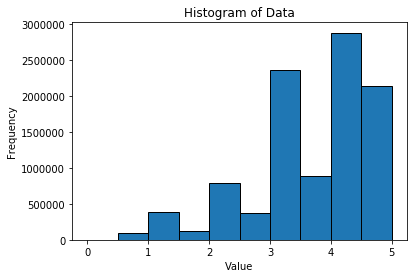

In [33]:
# 用直方图来表示用户对电影评分的分布
import matplotlib.pyplot as plt
import numpy as np
# 数据
data = ratings_list

# 画直方图
bins = np.arange(0,5.5,0.5)
plt.hist(data, bins=bins, edgecolor='black')

# 设置标题和轴标签
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
# 显示图形
plt.show()
# 

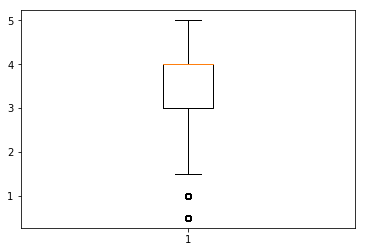

In [34]:
# 画盒图
plt.boxplot(data)
plt.show()

In [35]:
# 统计每种体裁的电影的平均评分并且画图
genres = itertools.chain(*[genres.split('|') for genres in movies['genres']]) # 对类型进行分割
genres_set = set(genres)
genres2idx = {g: i for i,g in enumerate(genres_set)}
movieId2genres = {}
genres_type = len(genres2idx)
genres_score = [0.] * genres_type
genres_cnt = [0] * genres_type
for movieId, genres in zip(movies['movieId'], movies['genres']):
    movieId2genres[movieId] = genres.split('|')
for movieId, score in zip(rating['movieId'], rating['rating']):
    gs = movieId2genres[movieId]
    for g in gs:
        genres_idx = genres2idx[g]
        genres_score[genres_idx] += score
        genres_cnt[genres_idx] += 1
genres_avg_score = [score/cnt for score,cnt in zip(genres_score, genres_cnt)]
genres_list = list(genres_set)
ys = [genres_avg_score[genres2idx[genre]] for genre in genres_list]
xs = genres_list
ys, xs = zip(*sorted(zip(ys, xs), key=lambda x: x[0]))  # 按照评分进行排序

avg_score: [3.27, 3.4, 3.42, 3.42, 3.44, 3.49, 3.5, 3.51, 3.55, 3.56, 3.56, 3.6, 3.64, 3.67, 3.67, 3.68, 3.76, 3.78, 3.78, 4.01]


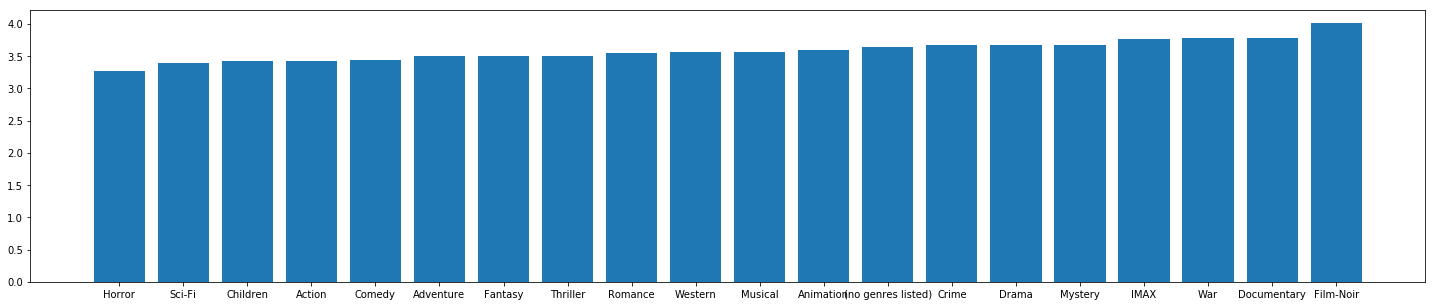

In [36]:
# 对每个体裁的电影画图表示其平均分
fig, ax = plt.subplots(figsize=(25,5))
ax.bar(range(len(xs)), ys)
ax.set_xticks(range(len(xs)))
ax.set_xticklabels(xs)
print(f'avg_score: {[round(score, 2) for score in ys]}')
plt.show()
# 从下图中可以看到，Horror电影的评分最低，为3.27 Film_Noir的均分最高,为4.01

# 3.2 数据缺失的处理
观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:
将缺失部分剔除
用最高频率值来填补缺失值
通过属性的相关关系来填补缺失值
通过数据对象之间的相似性来填补缺失值
注意：在处理后完成，要对比新旧数据集的差异。

In [37]:
# 统计所有用户的数量
userId_set = set(rating['userId'].tolist())
all_user_cnt = len(userId_set)
print(f"所有的用户数量是：{all_user_cnt}")
# 统计所有的电影的数量：
print(f"所有的电影数量是: {movies_cnt}")
# 构造评分矩阵，大小为用户的数量 * 电影的数量
user_movie = [[],[]]
user_movie_score = []
for userId, movieId, score in zip(rating['userId'], rating['movieId'], rating['rating']):
    user_movie[0].append(userId)
    user_movie[1].append(movieId)
    user_movie_score.append(score)
record_cnt = len(user_movie_score)
lack_comment_cnt = all_user_cnt * movies_cnt - len(user_movie_score)
lack_rate = lack_comment_cnt / (all_user_cnt * movies_cnt) * 100
print(f"共有{record_cnt}条评分数据, 缺失了{lack_comment_cnt}条数据，缺失比率是{lack_rate}%")


所有的用户数量是：69878
所有的电影数量是: 10681
共有10000054条评分数据, 缺失了736366864条数据，缺失比率是98.66016917968489%


从上面的分析中可以看出，用户-电影的评分矩阵是一个非常稀疏的矩阵，其中大多数值为空值，这表示大多数用户只是看了少数电影，并没有对大多数的电影进行过评分。

In [38]:
# 在剔除缺失值的情况下，找出评分最高的10部电影
movieId2title = {}
for movieId, title in zip(movies['movieId'], movies['title']):
    movieId2title[movieId] = title

from torch_scatter import scatter_mean
import torch
user_movie_score = torch.tensor(user_movie_score)
user_movie = torch.tensor(user_movie)
movie_avg_score = scatter_mean(src=user_movie_score, index=user_movie[1])
movie_idxs = torch.arange(movie_avg_score.size(0))
movie_avg_score, movie_idxs = zip(*sorted(zip(movie_avg_score, movie_idxs), key=lambda x: x[0], reverse=True))
movie_title = [movieId2title[movieId.item()] for movieId in movie_idxs[:10]]
print("评分最高的十部电影是:")
for i in range(10):
    print('{}, {}'.format(movie_title[i], movie_avg_score[i]))

评分最高的十部电影是:
Satan's Tango (Sátántangó) (1994), 5.0
Shadows of Forgotten Ancestors (1964), 5.0
Fighting Elegy (Kenka erejii) (1966), 5.0
Sun Alley (Sonnenallee) (1999), 5.0
Blue Light, The (Das Blaue Licht) (1932), 5.0
More (1998), 4.75
Who's Singin' Over There? (a.k.a. Who Sings Over There) (Ko to tamo peva) (1980), 4.75
Human Condition II, The (Ningen no joken II) (1959), 4.75
Human Condition III, The (Ningen no joken III) (1961), 4.75
Constantine's Sword (2007), 4.75


In [39]:
# 采用最高频率来填充空值
score_freq = [Counter() for i in range(movies_cnt)]
for movieId, score in zip(user_movie[1], user_movie_score):
    score_freq[movie2idx[movieId.item()]][score] += 1

In [40]:
idx2movie = {idx: movie for movie,idx in movie2idx.items()}

from torch_scatter import scatter_sum
from tqdm import tqdm
movie_score_sum = scatter_sum(src=user_movie_score, index=user_movie[1])
movie_score_cnt = scatter_sum(src=torch.ones_like(user_movie[0]), index=user_movie[1])

new_scores = [0.] * movies_cnt
for idx in tqdm(range(movies_cnt),total=movies_cnt):
    most_freq = score_freq[idx].most_common()  # 出现最多的评分
    most_common_score = 0
    if len(most_freq) != 0: # 被评分过的电影
        most_common_score = most_freq[0][0]
    movie_idx = idx2movie[idx]
    new_avg_score = most_common_score * (all_user_cnt - movie_score_cnt[movie_idx]) + movie_score_sum[movie_idx]
    new_scores[idx] = new_avg_score / all_user_cnt

new_scores = [new_scores[movie2idx[movie]] for movie in all_movies]
movie_idxs, movies_new_score = zip(*sorted(zip(all_movies, new_scores), key=lambda x: x[1], reverse=True))
movie_title = [movieId2title[movieId] for movieId in movie_idxs[:10]]

print("评分最高的十部电影是:")
for i in range(10):
    print('{}, {}'.format(movie_title[i], movies_new_score[i]))


100%|██████████| 10681/10681 [00:02<00:00, 3792.34it/s]


评分最高的十部电影是:
Shadows of Forgotten Ancestors (1964), 5.0
Satan's Tango (Sátántangó) (1994), 5.0
Fighting Elegy (Kenka erejii) (1966), 5.0
Sun Alley (Sonnenallee) (1999), 5.0
Blue Light, The (Das Blaue Licht) (1932), 5.0
Who's Singin' Over There? (a.k.a. Who Sings Over There) (Ko to tamo peva) (1980), 4.999985694885254
Human Condition II, The (Ningen no joken II) (1959), 4.999985694885254
Human Condition III, The (Ningen no joken III) (1961), 4.999985694885254
Shanghai Express (1932), 4.999978542327881
Life of Oharu, The (Saikaku ichidai onna) (1952), 4.999978542327881


可以看出，用众数替代空值之后，前10名的电影排名发生一些变化。

In [41]:
# 通过属性的相关关系来填补空缺值
# 对于缺失的电影评分，认为电影的评分受到电影体裁的影响，因此用电影体裁的平均值替代空缺值。
new_scores = [0.] * movies_cnt
genres_avg_score = [score/cnt for score,cnt in zip(genres_score, genres_cnt)]

for idx in tqdm(range(movies_cnt),total=movies_cnt):
    movie_idx = idx2movie[idx]
    gs = movieId2genres[movie_idx]
    g_score = sum([genres_avg_score[genres2idx[g]] for g in gs]) / len(gs)  # 得到体裁的平均评分
    new_avg_score = g_score * (all_user_cnt - movie_score_cnt[movie_idx]) + movie_score_sum[movie_idx]
    new_scores[idx] = new_avg_score / all_user_cnt

new_scores = [new_scores[movie2idx[movie]] for movie in all_movies]
movie_idxs, movies_new_score = zip(*sorted(zip(all_movies, new_scores), key=lambda x: x[1], reverse=True))
movie_title = [movieId2title[movieId] for movieId in movie_idxs[:10]]

print("评分最高的十部电影是:")
for i in range(10):
    print('{}, {}'.format(movie_title[i], movies_new_score[i]))

100%|██████████| 10681/10681 [00:00<00:00, 35491.19it/s]


评分最高的十部电影是:
Shawshank Redemption, The (1994), 4.022471904754639
Out of the Past (1947), 4.0134501457214355
Big Knife, The (1955), 4.012068271636963
Pickup on South Street (1953), 4.012059211730957
Kiss Me Deadly (1955), 4.011995792388916
Railroaded! (1947), 4.011919021606445
Big Combo, The (1955), 4.011877059936523
Scarlet Street (1945), 4.011768341064453
Hitch-Hiker, The (1953), 4.011577606201172
Force of Evil (1948), 4.0114827156066895


可以看出，由于存在大量的空值，使用电影的体裁类型评分作为空值会对原本的数据造成严重的破坏。如果存在电影的导演或者演员，通过导演或演员来进行关联预测可能是更好的方法。

In [42]:
# 通过数据对象之间的相似性来填补缺失值
# 通过用户对电影的tag来进行评分
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def preprocess_word(word):
    try:
        word = word.lower()
        ans = ""
        for char in word:
            if ord(char) >= ord('a') and ord(char) <= ord('z'):
                ans += char
    except:
        return "non"
    return ans

word_list = list(set([preprocess_word(word) for word in tags['tag'].tolist()]))
positive_score = [0.] * len(word_list)

for i,word in enumerate(word_list):
    positive_score[i] = sia.polarity_scores(word)['compound']

# 把词性评分放缩了0-5之间
mx_score = max(positive_score)
mn_score = min(positive_score)
r = (mx_score - mn_score) / 5
positive_score = [(score - mn_score) / r for score in positive_score]

word2idx = {word: idx for idx,word in enumerate(word_list)}

movie_tag_score = [0.] *  movies_cnt
movie_tag_cnt = [0] * movies_cnt
for movieId, word in zip(tags['movieId'], tags['tag']):
    word = preprocess_word(word)
    movie_idx = movie2idx[movieId]
    movie_tag_score[movie_idx] += positive_score[word2idx[word]]
    movie_tag_cnt[movie_idx] += 1
media_score = Counter(positive_score).most_common()[0][0]
movie_tag_avg_score = [score/cnt if cnt>0 else media_score for score,cnt in zip(movie_tag_score, movie_tag_cnt)]
avg_tag_score = sum(movie_tag_score) / sum(movie_tag_cnt)
new_scores = [0.] * movies_cnt
movie_has_tag_cnt = 0
movie_without_tag_cnt = 0
for idx in tqdm(range(movies_cnt),total=movies_cnt):
    if movie_tag_cnt[idx] > 0:
        movie_score = movie_tag_avg_score[idx]
        movie_has_tag_cnt += 1
    else:
        movie_score = avg_tag_score
        movie_without_tag_cnt += 1
    movie_idx = idx2movie[idx]
    new_avg_score = movie_score * (all_user_cnt - movie_score_cnt[movie_idx]) + movie_score_sum[movie_idx]
    new_scores[idx] = new_avg_score / all_user_cnt
print(f"有标签的电影数量占比：{movie_has_tag_cnt/movies_cnt*100:.4f}%")
new_scores = [new_scores[movie2idx[movie]] for movie in all_movies]
movie_idxs, movies_new_score = zip(*sorted(zip(all_movies, new_scores), key=lambda x: x[1], reverse=True))
movie_title = [movieId2title[movieId] for movieId in movie_idxs[:10]]

print("评分最高的十部电影是:")
for i in range(10):
    print('{}, {}'.format(movie_title[i], movies_new_score[i]))

100%|██████████| 10681/10681 [00:00<00:00, 38543.28it/s]


有标签的电影数量占比：71.1637%
评分最高的十部电影是:
Liebestraum (1991), 4.953886032104492
Minnie and Moskowitz (1971), 4.587167263031006
Attack the Gas Station! (Juyuso seubgyuksageun) (1999), 4.527066707611084
Harrison's Flowers (2000), 4.526296138763428
Taste of Others, The (Le Goût des autres) (2000), 4.492273330688477
Johnson Family Vacation (2004), 4.263904571533203
Godzilla vs. The Sea Monster (Gojira-Ebira-Mosura: Nankai no daiketto) (1966), 4.263794898986816
Mating Habits of the Earthbound Human, The (1999), 4.263369083404541
Perfect Score, The (2004), 4.261618614196777
Inside Moves (1980), 4.194317817687988


在上面的处理中我认为用户对电影的tag，比如excellent, bad等词也能反映一定的电影评分，因此通过利用nltk的词性积极性评分，得到每个tag的积极性得分，之后把该评分放缩为区间[0-5]填补空缺值，之后得到新的电影的评分。存在的问题是首先nltk可能对词性的把握不够准确，另一个问题是由于大量空缺值的存在，导致填补完所有的空缺值对结果的影响会很大，如果一个小众的电影因为少量极好的评价就可能导致电影的评分过高。